# Post AQUAS Test Data Processing

Welcome to this Jupyter Notebook where I work on processing the data produced from Post AQUAS Tests (PAT) which represents the experimental evaluation section of my PhD.

---

Generally speaking, **publishers** measure the **latency** with the following headings:

| Length (Bytes) | Ave (us) | Std (us) | Min (us) | Max (us) | 50% (us) | 90% (us) |99% (us) | 99.99% (us) | 99.9999% (us)  |
|----------------|----------|----------|----------|----------|----------|----------|---------|-------------|----------------|

**Subscribers** measure the **throughput** with the following headings:

|Length (Bytes) | Total Samples | Ave Samples/s | Ave Mbps | Lost Samples |  Lost Samples (%)|
|---------------|---------------|---------------|----------|--------------|------------------|

---

Now the question is: What exactly are we trying to do here? What are we trying to show?

We want to understand how DDS performs. There are 4 sets of tests:

| Test | Description |
|------|-------------|
| 1. Base Case | Tests to see normal conditions. |
| 2. Participant Measure | Varying number of participants. |
| 3. Denial of Service | Imposter participants overload the network and saturate the throughput with large amounts of data. |
| 4. Data Access | For each publisher an extra subscriber subscribes to the data. |

Therefore, looking at the base case how do we measure the performance? We can plot the graphs of the throughput and latency for each publisher and subscriber.

In [13]:
from rich.jupyter import print
from rich.markdown import Markdown

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def get_files(dir_path):
    file_list = os.listdir(dir_path)
    all_files = list()
    # Iterate over all the entries
    for entry in file_list:
        # Create full path
        full_path = os.path.join(dir_path, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(full_path):
            all_files = all_files + get_files(full_path)
        else:
            all_files.append(full_path)
                
    return all_files

In [15]:
all_files = get_files("data")
clean_files = [file for file in all_files if file.endswith(".csv") and os.path.basename(file).startswith("clean_")]

---

## Set 1: Base Case

Let's organise the files according to the tests starting the base case:

In [23]:
base_case_files = [file for file in clean_files if file.startswith("data\\base_case") or file.startswith("data/base_case")]
print("Example: " + base_case_files[0])

Example: data/base_case_unicast/run_2/vm1_output/clean_pub_output.csv

Let's then break them down into their unicast and multicast counterparts:

### Unicast

Just going to put the base case unicast files into a list (we only look at the rerun):

In [24]:
base_case_unicast_files = [file for file in base_case_files if "base_case_unicast_rerun" in file]

Then we can put each run into its own list:

In [25]:
base_case_unicast_run1_files = [file for file in base_case_unicast_files if "run_1" in file]
base_case_unicast_run2_files = [file for file in base_case_unicast_files if "run_2" in file]
base_case_unicast_run3_files = [file for file in base_case_unicast_files if "run_3" in file]

#### Run 1
Let's look at the data in run 1. We will first look at the latencies:

vm1_output/clean_pub_output.csv

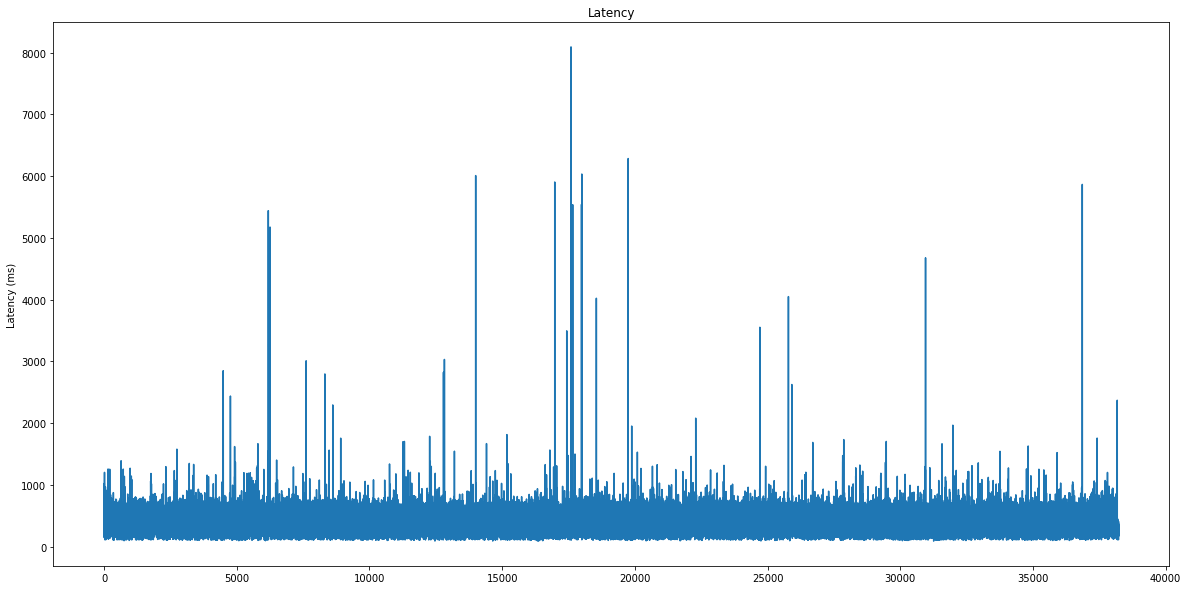

─────────────────────────────────────────────────────────────────────────────────────────────

vm1_output/clean_sub_output.csv

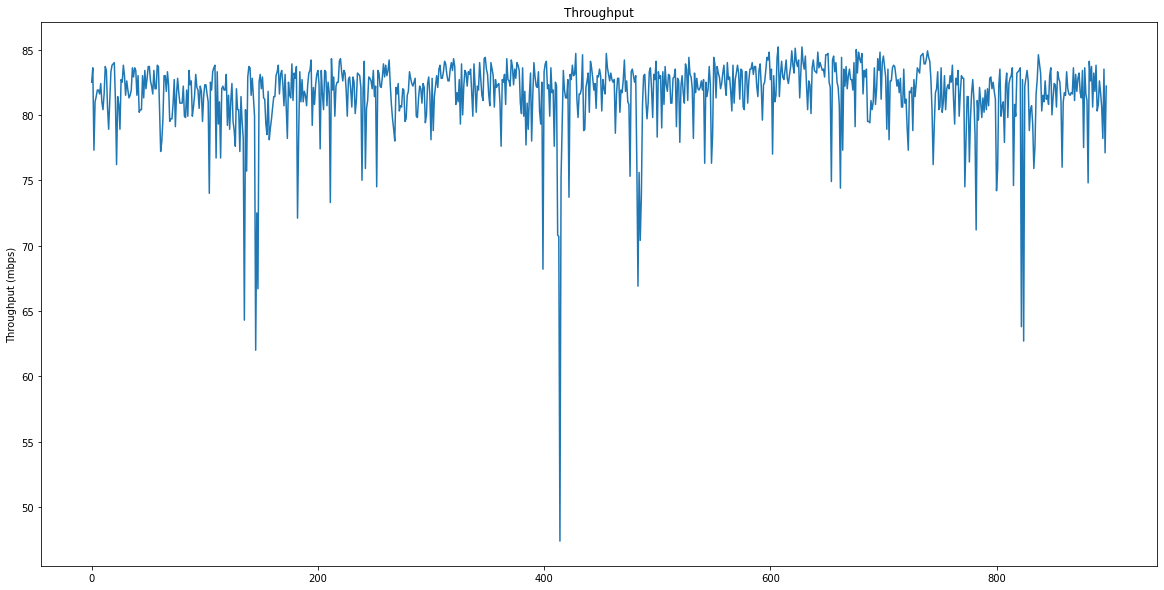

─────────────────────────────────────────────────────────────────────────────────────────────

vm3_output/clean_pub_output.csv

no numeric data to plot

─────────────────────────────────────────────────────────────────────────────────────────────

vm3_output/clean_sub_output.csv

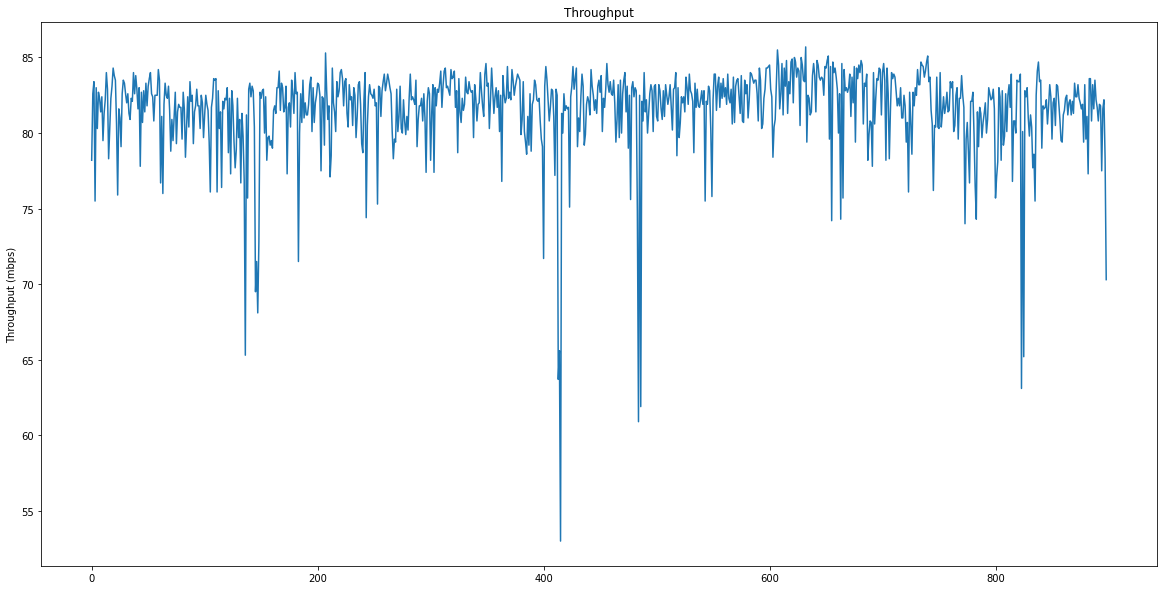

─────────────────────────────────────────────────────────────────────────────────────────────

vm2_output/clean_pub_output.csv

no numeric data to plot

─────────────────────────────────────────────────────────────────────────────────────────────

vm2_output/clean_sub_output.csv

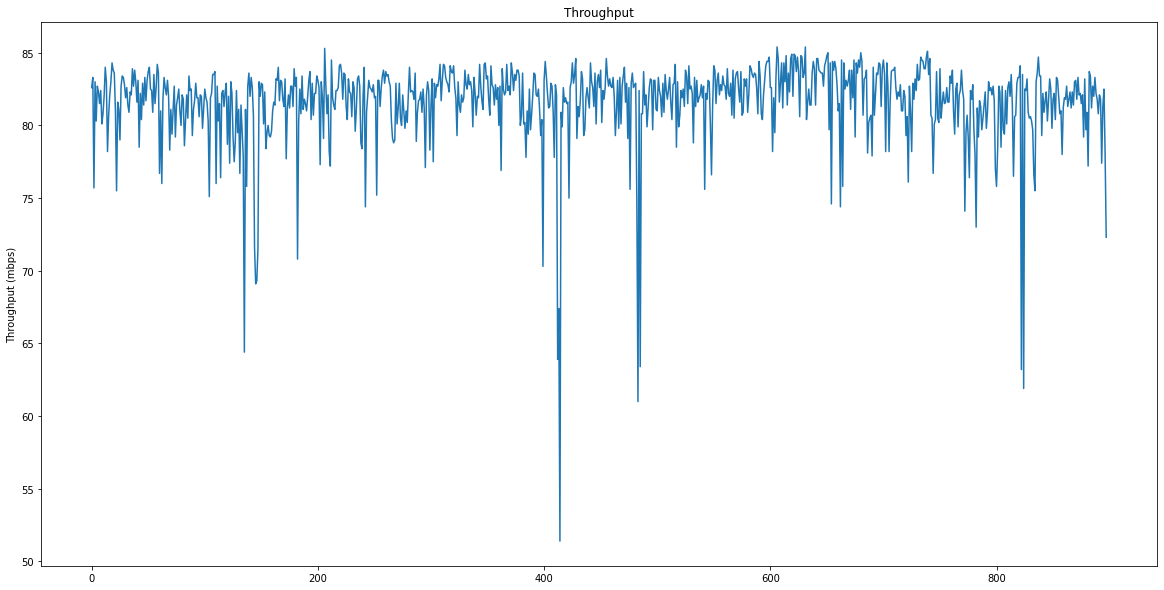

─────────────────────────────────────────────────────────────────────────────────────────────

In [28]:
for file in base_case_unicast_run1_files:
#   For windows:
#     print(Markdown("### " + file.replace("data\\base_case_unicast_rerun\\run_1\\", "")))
#   For Mac:
    print(Markdown("### " + file.replace("data/base_case_unicast_rerun/run_1/", "")))
    if "pub" in file:
        try:
            df = pd.read_csv(file)
            df.loc[:, "Latency"].plot(title="Latency", ylabel="Latency (ms)", figsize=(20, 10))
            plt.show()
            print(Markdown("---"))
        except Exception as e:
            print(e)
            print(Markdown("---"))
    else:
        try:
            df = pd.read_csv(file)
            df.loc[:, "Throughput"].plot(title="Throughput", ylabel="Throughput (mbps)", figsize=(20, 10))
            plt.show()
            print(Markdown("---"))
        except Exception as e:
            print(e)
            print(Markdown("---"))

#### Run 2
We can also do the same for the second run:

vm1_output/clean_pub_output.csv

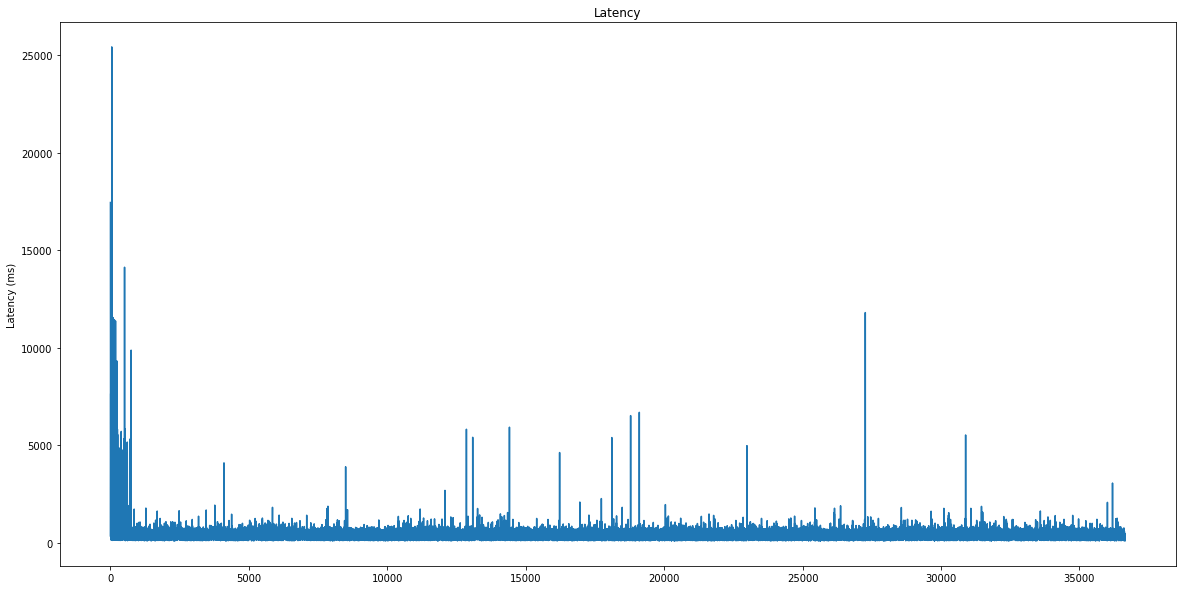

─────────────────────────────────────────────────────────────────────────────────────────────

vm1_output/clean_sub_output.csv

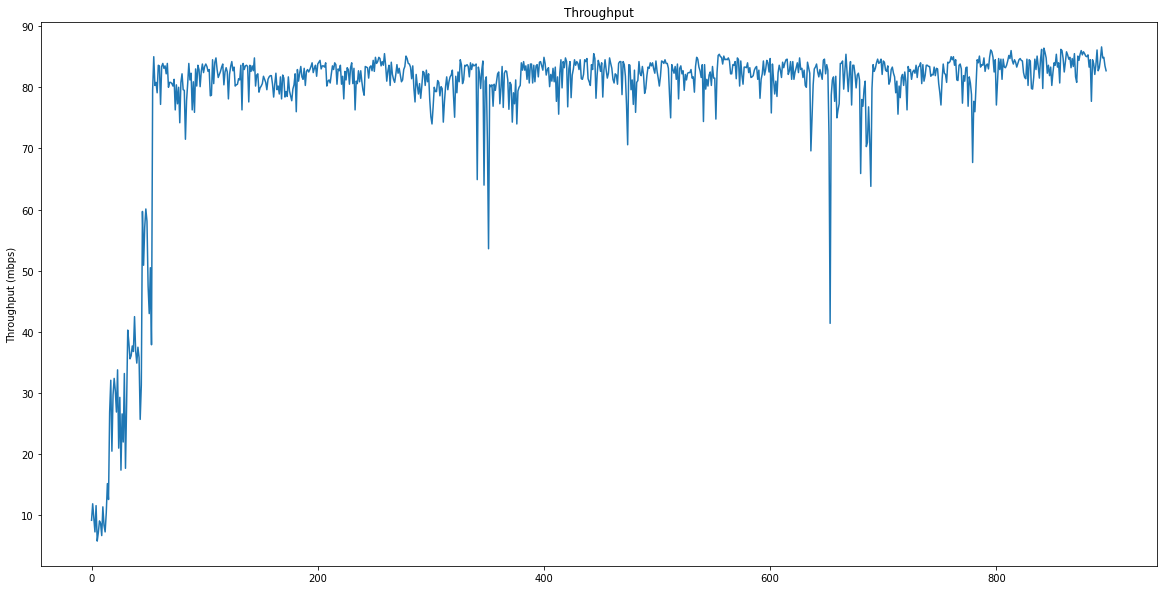

─────────────────────────────────────────────────────────────────────────────────────────────

vm3_output/clean_pub_output.csv

no numeric data to plot

─────────────────────────────────────────────────────────────────────────────────────────────

vm3_output/clean_sub_output.csv

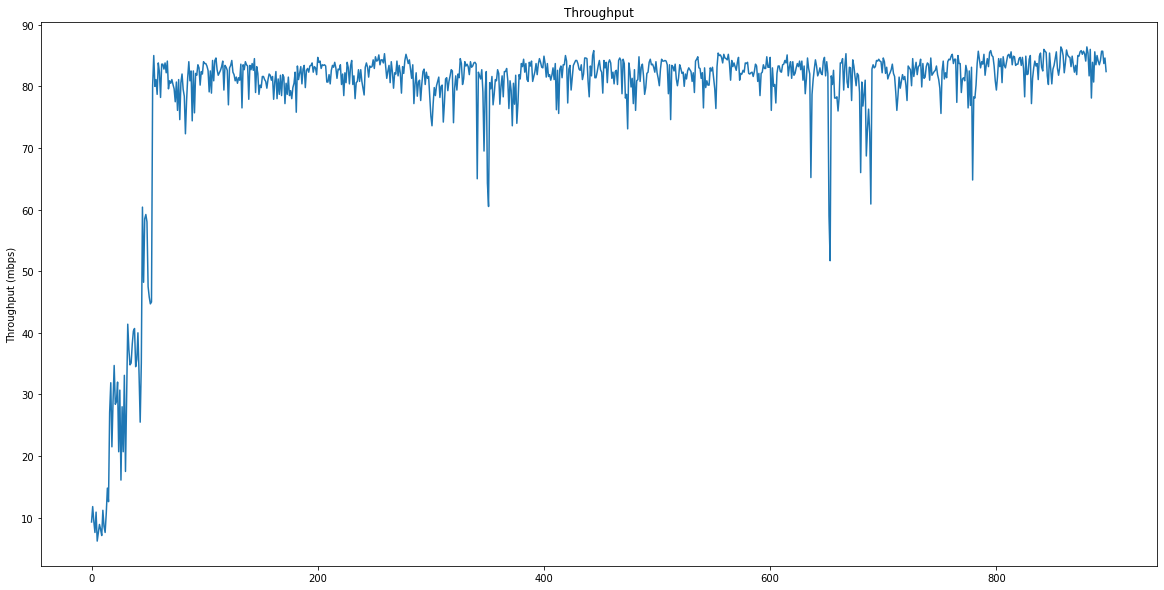

─────────────────────────────────────────────────────────────────────────────────────────────

vm2_output/clean_pub_output.csv

no numeric data to plot

─────────────────────────────────────────────────────────────────────────────────────────────

vm2_output/clean_sub_output.csv

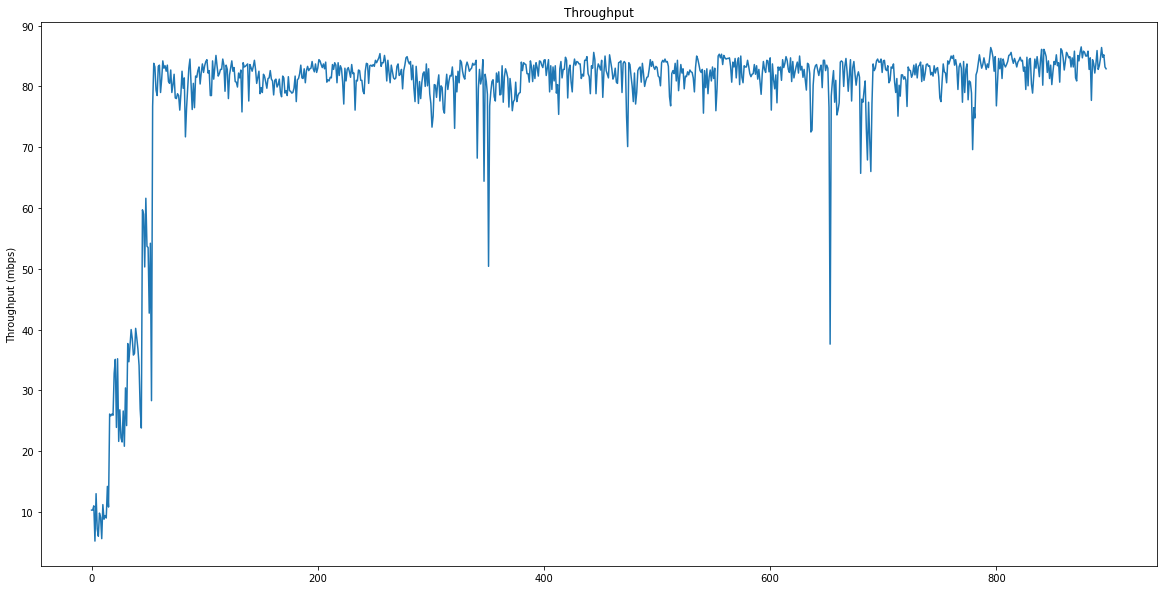

─────────────────────────────────────────────────────────────────────────────────────────────

In [30]:
for file in base_case_unicast_run2_files:
#   For windows:
#     print(Markdown("### " + file.replace("data\\base_case_unicast_rerun\\run_2\\", "")))
#   For Mac:
    print(Markdown("### " + file.replace("data/base_case_unicast_rerun/run_2/", "")))
    if "pub" in file:
        try:
            df = pd.read_csv(file)
            df.loc[:, "Latency"].plot(title="Latency", ylabel="Latency (ms)", figsize=(20, 10))
            plt.show()
            print(Markdown("---"))
        except Exception as e:
            print(e)
            print(Markdown("---"))
    else:
        try:
            df = pd.read_csv(file)
            df.loc[:, "Throughput"].plot(title="Throughput", ylabel="Throughput (mbps)", figsize=(20, 10))
            plt.show()
            print(Markdown("---"))
        except Exception as e:
            print(e)
            print(Markdown("---"))

#### Run 3

And for run 3:

vm1_output/clean_pub_output.csv

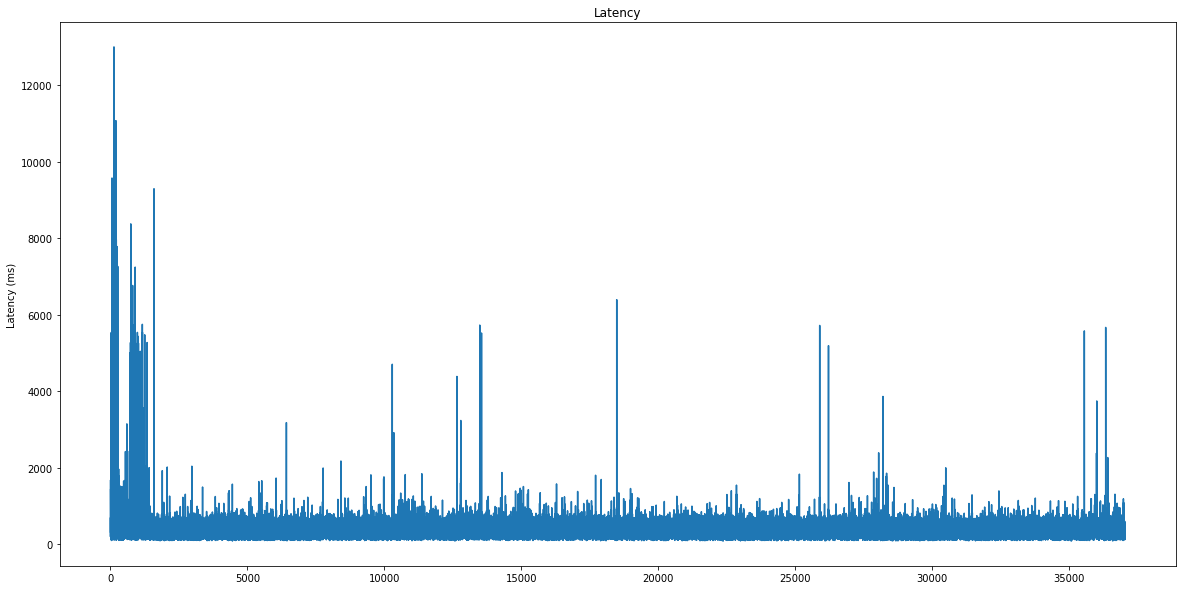

─────────────────────────────────────────────────────────────────────────────────────────────

vm1_output/clean_sub_output.csv

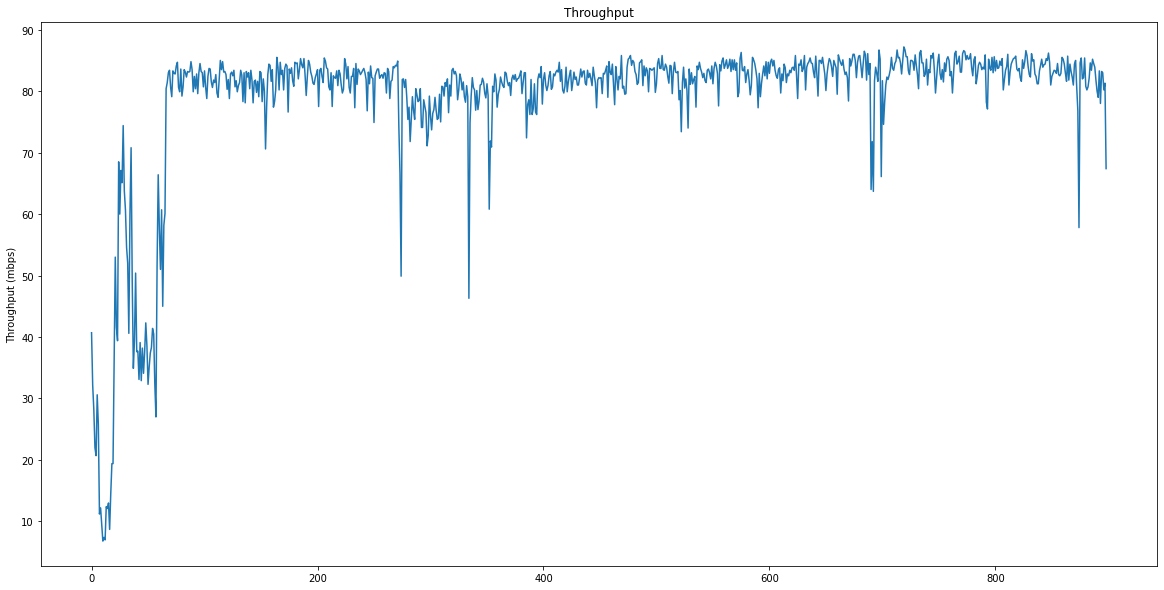

─────────────────────────────────────────────────────────────────────────────────────────────

vm3_output/clean_pub_output.csv

no numeric data to plot

─────────────────────────────────────────────────────────────────────────────────────────────

vm3_output/clean_sub_output.csv

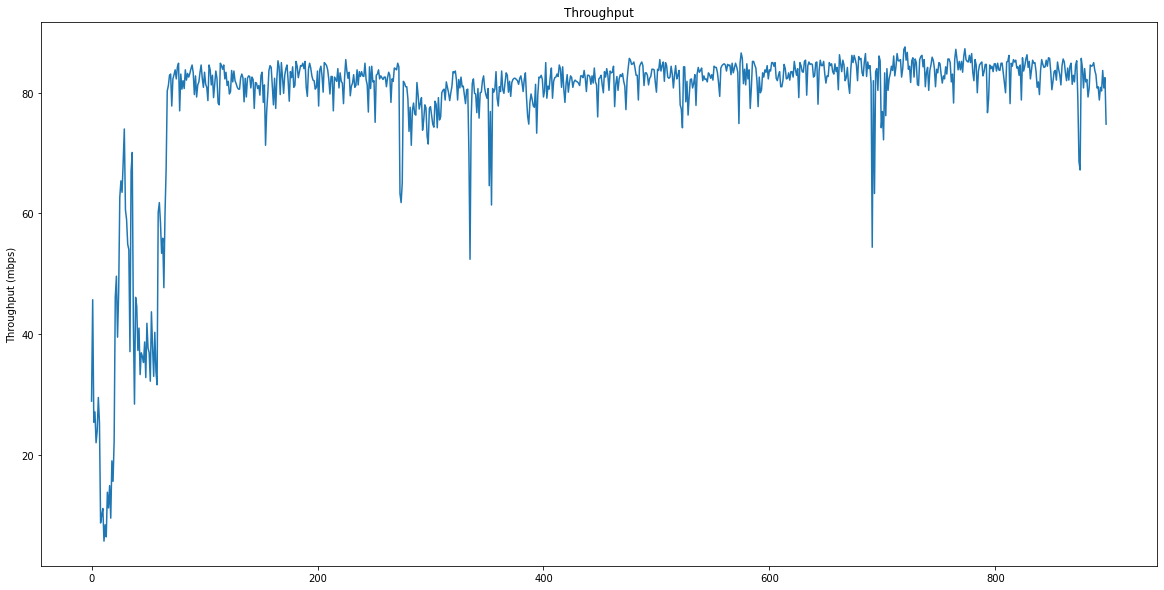

─────────────────────────────────────────────────────────────────────────────────────────────

vm2_output/clean_pub_output.csv

no numeric data to plot

─────────────────────────────────────────────────────────────────────────────────────────────

vm2_output/clean_sub_output.csv

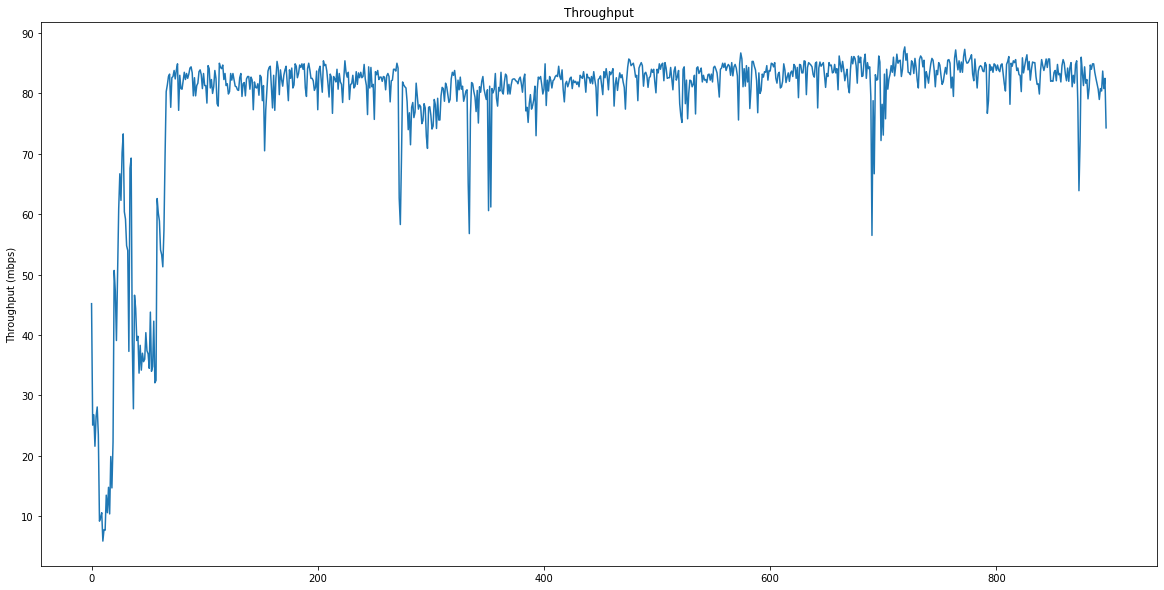

─────────────────────────────────────────────────────────────────────────────────────────────

In [32]:
for file in base_case_unicast_run3_files:
#   For windows:
#     print(Markdown("### " + file.replace("data\\base_case_unicast_rerun\\run_3\\", "")))
#   For Mac:
    print(Markdown("### " + file.replace("data/base_case_unicast_rerun/run_3/", "")))
    if "pub" in file:
        try:
            df = pd.read_csv(file)
            df.loc[:, "Latency"].plot(title="Latency", ylabel="Latency (ms)", figsize=(20, 10))
            plt.show()
            print(Markdown("---"))
        except Exception as e:
            print(e)
            print(Markdown("---"))
    else:
        try:
            df = pd.read_csv(file)
            df.loc[:, "Throughput"].plot(title="Throughput", ylabel="Throughput (mbps)", figsize=(20, 10))
            plt.show()
            print(Markdown("---"))
        except Exception as e:
            print(e)
            print(Markdown("---"))

Let's try to plot all 3 runs on the same graph:

In [77]:
base_case_unicast_run1_latency_file = [file for file in base_case_unicast_run1_files if file.endswith("clean_pub_output.csv") and "vm1_output" in file][0]
base_case_unicast_run2_latency_file = [file for file in base_case_unicast_run2_files if file.endswith("clean_pub_output.csv") and "vm1_output" in file][0]
base_case_unicast_run3_latency_file = [file for file in base_case_unicast_run3_files if file.endswith("clean_pub_output.csv") and "vm1_output" in file][0]

start = 50
end = 100
df = pd.read_csv(base_case_unicast_run1_latency_file)
# df["Latency"][start:end].plot(x="Latency")
df.sort_values('Latency').plot(x = 'Latency', grid = True)
df = pd.read_csv(base_case_unicast_run2_latency_file)
# df["Latency"][start:end].plot(x="Latency")
df = pd.read_csv(base_case_unicast_run3_latency_file)
# df["Latency"][start:end].plot(x="Latency", figsize=(20,10))
# plt.show()

KeyError: 'Latency'

In [33]:
for file in clean_files[0:10]:
    print(file)
    try:
        df = pd.read_csv(file)
        print(df.head())
    except Exception as e:
        pass

data/participant_measure_unicast_1-1/run_2/clean_pub_8_output.csv

Empty DataFrame
Columns: [Length, Latency, Average Latency, Standard Deviation, Minimum Latency, Maximum 
Latency]
Index: []

data/participant_measure_unicast_1-1/run_2/clean_pub_5_output.csv

Empty DataFrame
Columns: [Length, Latency, Average Latency, Standard Deviation, Minimum Latency, Maximum 
Latency]
Index: []

data/participant_measure_unicast_1-1/run_2/clean_sub_7_output.csv

Length  Total Samples  Samples Per Second  Average Samples Per Second  \
0   100.0        37534.0             13111.0                     13111.0   
1   100.0        55887.0             18350.0                     15730.0   
2   100.0        74995.0             18963.0                     16808.0   
3   100.0        87490.0             12406.0                     15708.0   
4   100.0        96329.0              8790.0                     14324.0   

   Throughput  Average Throughput  Lost Samples  Lost Samples Percentage  
0        10.5                10.5           0.0                      0.0  
1        14.7                12.6           0.0                      0.0  
2        15.2                13.4           0.0                      0.0  
3         9.9                12.6           0.0                      0.0  
4         7.0                11.5           0.0                      0.0

data/participant_measure_unicast_1-1/run_2/clean_sub_2_output.csv

Length  Total Samples  Samples Per Second  Average Samples Per Second  \
0   100.0        44791.0             15843.0                     15843.0   
1   100.0        62227.0             17422.0                     16632.0   
2   100.0        80555.0             18320.0                     17195.0   
3   100.0        89503.0              8917.0                     15126.0   
4   100.0        99089.0              9584.0                     14017.0   

   Throughput  Average Throughput  Lost Samples  Lost Samples Percentage  
0        12.7                12.7           0.0                      0.0  
1        13.9                13.3           0.0                      0.0  
2        14.7                13.8           0.0                      0.0  
3         7.1                12.1           0.0                      0.0  
4         7.7                11.2           0.0                      0.0

data/participant_measure_unicast_1-1/run_2/clean_pub_0_output.csv

data/participant_measure_unicast_1-1/run_2/clean_sub_8_output.csv

Length  Total Samples  Samples Per Second  Average Samples Per Second  \
0   100.0        37530.0             12823.0                     12823.0   
1   100.0        55905.0             18372.0                     15598.0   
2   100.0        74995.0             18945.0                     16713.0   
3   100.0        87490.0             12406.0                     15636.0   
4   100.0        96323.0              8784.0                     14266.0   

   Throughput  Average Throughput  Lost Samples  Lost Samples Percentage  
0        10.3                10.3           0.0                      0.0  
1        14.7                12.5           0.0                      0.0  
2        15.2                13.4           0.0                      0.0  
3         9.9                12.5           0.0                      0.0  
4         7.0                11.4           0.0                      0.0

data/participant_measure_unicast_1-1/run_2/clean_pub_7_output.csv

Empty DataFrame
Columns: [Length, Latency, Average Latency, Standard Deviation, Minimum Latency, Maximum 
Latency]
Index: []

data/participant_measure_unicast_1-1/run_2/clean_sub_5_output.csv

Length  Total Samples  Samples Per Second  Average Samples Per Second  \
0   100.0        30581.0             14260.0                     14260.0   
1   100.0        47605.0             17022.0                     15641.0   
2   100.0        65011.0             17389.0                     16224.0   
3   100.0        82974.0             17916.0                     16647.0   
4   100.0        91290.0              8308.0                     14979.0   

   Throughput  Average Throughput  Lost Samples  Lost Samples Percentage  
0        11.4                11.4           0.0                      0.0  
1        13.6                12.5           0.0                      0.0  
2        13.9                13.0           0.0                      0.0  
3        14.3                13.3           0.0                      0.0  
4         6.6                12.0           0.0                      0.0

data/participant_measure_unicast_1-1/run_2/clean_sub_0_output.csv

Length  Total Samples  Samples Per Second  Average Samples Per Second  \
0   100.0        36222.0             12680.0                     12680.0   
1   100.0        54919.0             18692.0                     15686.0   
2   100.0        74135.0             19213.0                     16862.0   
3   100.0        87395.0             13250.0                     15959.0   
4   100.0        96085.0              8689.0                     14505.0   

   Throughput  Average Throughput  Lost Samples  Lost Samples Percentage  
0        10.1                10.1           0.0                      0.0  
1        15.0                12.5           0.0                      0.0  
2        15.4                13.5           0.0                      0.0  
3        10.6                12.8           0.0                      0.0  
4         7.0                11.6           0.0                      0.0

data/participant_measure_unicast_1-1/run_2/clean_pub_2_output.csv

Empty DataFrame
Columns: [Length, Latency, Average Latency, Standard Deviation, Minimum Latency, Maximum 
Latency]
Index: []